# Homework 

*Welcome to Machine Learning Housing Corporation! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

For your HW we chose the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning, so we will pretend it is recent data. We also added a categorical attribute and removed a few features for teaching purposes.


The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.
Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.


## Setup

In [194]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get the data
You can download the data from the following <a href="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz">website</a>.

Extract the file and put it in the directory of your current folder.

The manual way is easy but the more you become a computer scientist, the more you would like to do things  automatically, you can execute the following code, to fetch the data automatically.
Automating the process of fetching the data is also useful if you need to install the dataset on multiple machines.

In [195]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

### Call the above function to fetch the housing data. 
When you call this function, it creates a datasets/housing directory in your workspace, downloads the housing.tgz file, and extracts the housing.csv from it in this directory.


In [196]:
fetch_housing_data()

### Load the data using Pandas. Put it in a variable called housing.

In [197]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [198]:
housing = load_housing_data()

### Get a quick description of the data

- check out the info of the data frame
- print out its head

In [199]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [200]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### What do you notice? 

- which attributes are numerical?
- which attributes are not numerical? and what are their types?

### Find out what categories exist in 'ocean_proximity' column and how many districts belong to each category.

Hint: use the `value_counts()` method on your data frame.

In [201]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Show a summary of the numerical attributes

In [202]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot a histogram for each numerical attribute

In [203]:
%matplotlib inline
import matplotlib.pyplot as plt

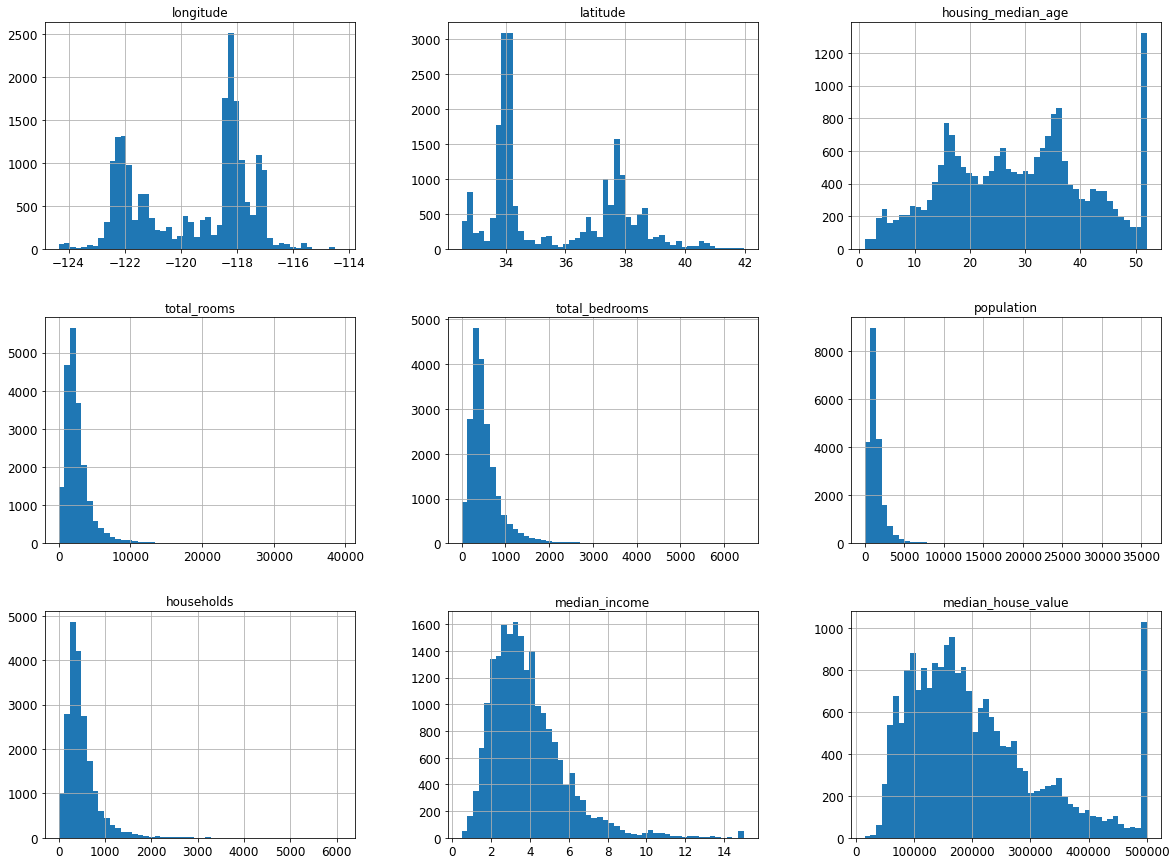

In [204]:
housing.hist(bins =50, figsize=(20,15))
plt.show()

### What do you notice?

- is the median income attribute expressed in local currency?
- have some attributes' values been caped? if so tell which one, and what consequences this may have.
- how do the attributes' scales compare?
- are the histogramms bell-shaped? or have fat tails?

– The median income is not expressed in local currency. It's expressed as a simple float number. <br>
– Yes, some attributes have been caped. The caped attributes are the "housing_median_age" and the "median_house_value". The problem here is the fact that our machine learning model trained with this dataset will not be able to made good prediction for new observations were these 2 attributes are above the caped values. <br>
– Attributes' scales are compared differently. each attribute has its own scale <br>
– The histogramms are bell-shaped<br>

## Create a Test Set
### Using random selection

Import `train_test_split` from `sklearn.model_selection` (set the `test_size` ratio to 0.2), to create a train_set and a test_set dataframe.

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
train_set, test_set = train_test_split(housing, test_size=0.2)

### Using Stratified Selection
Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Let’s look at the median income histogram more closely 

#### Plot the histogram of the "median_income" column

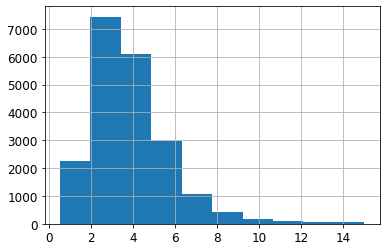

In [207]:
housing["median_income"].hist()
plt.show()

Most median income values are clustered around 2–5 (tens of thousands of dollars), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5
into category 5:

In [208]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

Show the `income_cat` counts, and plot its histogram now

In [209]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

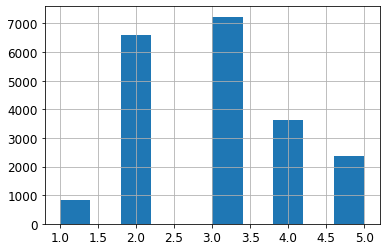

In [210]:
housing["income_cat"].hist()
plt.show()

Now you are ready to do stratified sampling based on the income category. 
#### Use Scikit-Learn’s StratifiedShuffleSplit to do stratified sampling

The following code does the job, with a ratio of 0.2.

In [211]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2.0
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2.0
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4.0
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4.0


To see if this worked as expected, compare the income category proportions in the full housing dataset and the test dataset we just obtained:

In [212]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [213]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

The following code compares the income category proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling. As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.



In [214]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [215]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


#### Drop the "income_cat" column from the stratified training and testing sets
Use `data.drop("column_name", axis=1, inplace=True)`. 

In [216]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

## Data Exploration


Let’s create a copy so you can play with it without harming the training set:

In [217]:
housing = strat_train_set.copy()

### Visualize the geographical data : 
#### Use the geographical information (latitude and longitude) to create a scatterplot of all districts.
`data.plot(kind="scatter", x="column_name", y="column_name")`

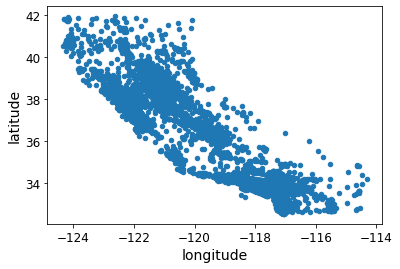

In [218]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the
alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.
Do it!

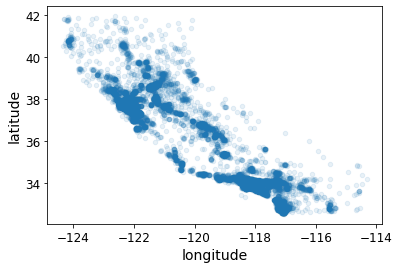

In [219]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

You can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

More generally, our brains are very good at spotting patterns on pictures, but you may need to play around with visualization parameters to make the patterns stand out.

#### Create a scatter plot of the geographical information in function of the district's population and the price of the house.
This can be done by manipulating some parameters of the scatter plot function.
`data.plot(kind='scatter', x, y, s=data_column, label="s_label", c=None, kwrds)`
- s : The size of each point. Possible values are:
  - A single scalar so all points have the same size.
  - A sequence of scalars, which will be used for each point’s size recursively. For instance, when passing     [2,14] all points size will be either 2 or 14, alternatively.
- c : The color of each point. Possible values are:
  - A single color string referred to by name, RGB or RGBA code, for instance ‘red’ or ‘#a98d19’.
  - A sequence of color strings referred to by name, RGB or RGBA code, which will be used for each point’s color recursively. For instance [‘green’,’yellow’] all points will be filled in green or yellow, alternatively.
  - A column name or position whose values will be used to color the marker points according to a colormap.
- kwrds: Keyword arguments to pass on to DataFrame.plot().

To answer this question:
- Set s to housing population divided by 100
- Set c to the price of the house "median_house_value"
- Use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices): `cmap=plt.get_cmap("jet")`. check <a href="https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html">this</a> for more details. 

In the resulting plot, the radius of each circle represents the district’s population (option s), and the color represents the price (option c). 

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611).

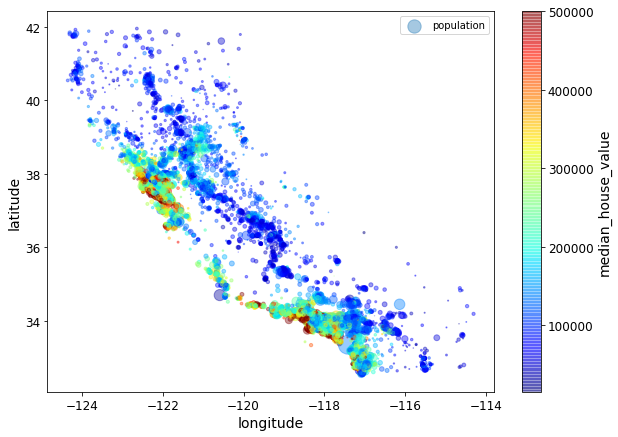

In [220]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

#### What does the above plot show? Try to intrepret it.

### Looking for correlations
#### Find the Pearson correlation  of the housing data

Hint: apply the `corr()` method to your dataframe

In [221]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


#### Sort the values of the "median_house_value" in the correlation matrix in descending order
The `median_house_value` in the correlation matrix represents the correlation between all the features and the target feature (what we are trying to predict). So sorting its values will show us which features are the most correlated with it.

Use `.sort_values(ascending=False)`

In [222]:
housing.corr().sort_values("median_house_value", ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724


#### What do you notice from these correlations?

• I observe that the "median_income" It's more correlated with the "median_house_value" than others attributes.

#### Use scatter_matrix from Pandas to plot the correlations between "median_house_value", "median_income", "total_rooms" and "housing_median_age"

In [223]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

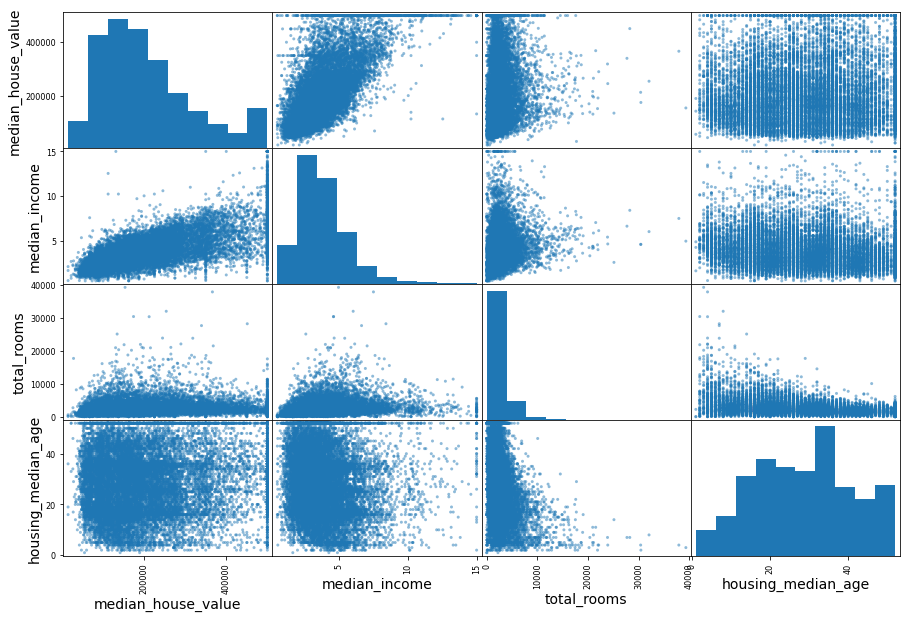

In [224]:
corr_column = housing[["median_house_value", "median_income", "total_rooms",\
"housing_median_age"]]
scatter_matrix(corr_column, figsize=(15, 10))

From the plot, which attribute seems to be the most promising to predict the house price?

The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot

Zoom in on it by plotting its scatter plot in function of the median house value.

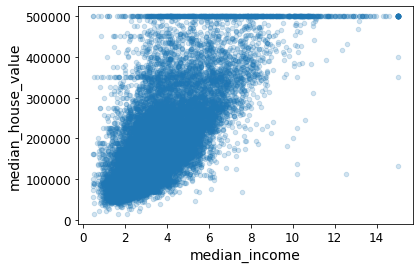

In [225]:
housing.plot( kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
plt.show()

#### What does this plot reveal?

### Experimenting with Attributes Combinations 
The total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. 

Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. 

Create 3 new attributes and put them in new columns: 
- rooms_per_household : Total rooms divided by the number of households
- bedrooms_per_room : Total bedrooms divided by the Total rooms
- population_per_household : Population divided by the number of housholds

In [226]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing ["population"]/housing["households"]

In [227]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


#### Compute the correlation matrix again and sort its values in descending order


In [228]:
housing.corr().sort_values("median_house_value", ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population_per_household,-0.000410,0.005420,0.015031,-0.024810,-0.028370,0.076225,-0.027416,0.021822,-0.021985,-0.005314,0.004279,1.000000
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410


#### What do you notice about the new correlations?

## Prepare the data for Machine Learning algorithms


### Data Cleaning

#### Drop the labels from the training set and create a new variable for the labels
We separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values.

In [229]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

#### Lets check a sample of the missing values.


In [230]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


#### Delete all the rows having missing values in the total_bedrooms column.

Use the `dropna()` method.

In [231]:
housing.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


#### Delete the "total_bedrooms" column

In [232]:
#housing.drop("total_bedrooms", inplace=True, axis=1)

#### Fill the missing values with median

From the sample of incomplet rows:

In [233]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

use the `fillna(median, inplace=True)` method, where median will have been computed from `housing["total_bedrooms"]

In [234]:
#housing["total_bedrooms"].fillna(housing["total_bedrooms"].median, inplace=True)

#### Preprocess the categorical input feature, `ocean_proximity`:

Extract its column and store it into a new dataframe, call it `housing_cat`

In [235]:
housing_cat = housing[["ocean_proximity"]]

Import `LabelEncoder` from `sklearn.preprocessing`

In [236]:
 from sklearn.preprocessing import LabelEncoder

apply its `fit_transform()` method to `housing_cat`, and store the result into `housing_cat_encoded`

In [237]:
labelencoded = LabelEncoder()

In [238]:
housing_cat_encoded = labelencoded.fit_transform(housing_cat)
housing_cat_encoded

/Users/hubert.ayissi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 4, ..., 1, 0, 3])

Now one-hot-encode `housing_cat`:

In [239]:
from sklearn.preprocessing import OneHotEncoder

apply its `fit_transform()` method to `housing_cat`, and store the result into `housing_cat_1hot`

In [240]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [241]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [242]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Custom Transformers 
Here is a transformer class that adds the combined attributes we discussed earlier.
This class computes and adds the bedroom per room as well as the population per houshold that you have computed last lecture.

In [243]:
from sklearn.base import BaseEstimator, TransformerMixin

# Specify the indices of the columns from the dataset that you will be using to do your calculation
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# Define a class called CombinedAttributesAdder (you can name it whatever you want)
# The class takes two arguments BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        # compute the rooms per houshold and the population per household
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        # if the argument add_bedrooms_per_room is true then compute the number of bedrooms per rooms
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # convert the result to a Numpy array
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        # if not convert the others to a numpy array
        else:
            return np.c_[X, rooms_per_household, population_per_household]

To use the transformer just defined you need to first create an instance of the class

In [244]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

Then you apply the transform function on it

In [245]:
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In this example the transformer has one hyperparameter, `add_bedrooms_per_room`, set to `True` by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. 

The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

You can now convert the result to a dataframe

In [246]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
2,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

### Build a pipeline for numerical attributes

In [247]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

Define the dataframe of numerical attributes, by dropping `ocean_proximity` from the `housing` dataframe, call the result `housing_num`.
The appply the above pipeline to `housing_num`. Store the result in a dataframe called `housing_num_tr`.

In [248]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [249]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

### You now have a pipeline for numerical values, and you also need to apply transformations on the categorical values: here is how can you join these transformations into a single pipeline:

In [250]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [251]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [252]:
housing_prepared.shape

(16512, 16)

## Select and train a model 

### Training and evaluating on the training set

#### Train a Linear Regression model

Import it from sklearn and fit it on `housing_prepared` vs `housing_labels`

In [253]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

You now have a working linear model

#### Try the full preprocessing pipeline on a few training instances

- Select 5 rows from from `housing` and `housing_labels` (corresponding to the same rows in `housing`!), call the resulting dataframe `some_data` and `some_labels`
- apply the full pipeline to `some_data`, calling the result `some_data_prepared`
- apply the linear model `predict()` method on `some_data_prepared`, and print out the actual labels of `some_labels` to compare

In [254]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [255]:
some_data_prepared = full_pipeline.transform(some_data)

In [256]:
lin_reg.predict(some_data_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [257]:
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

#### Measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function

In [258]:
from sklearn.metrics import mean_squared_error 

housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

68628.19819848923

#### What do you think about  this error?

#### Train a Decision Tree Regressor 
This is a powerful model, capable of finding complex nonlinear relationships in the data. Use the class `DecisionTreeRegressor(random_state=42)`. Import it from from `sklearn.tree`. 

In [259]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

#### Evaluate the model on the training set using MSE

In [260]:
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels,\
                               housing_predictions, squared=False)
tree_rmse

0.0

#### What do you think about  this error?

Is the model doing a great job or badly overfitting?

### Better Evaluation using Cross Validation

#### Evaluate the tree regression model using 10-fold cross validation 

In [261]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [262]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


**What's your interpretation of the cross validation scores?**

#### Compute the same scores for the Linear Regression model just to be sure:

use the same code as above replacing `tree_reg`, and use the `display_score` function:

In [263]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [264]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983507


**What's your conclusion?**

That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

#### Try one last model now: the RandomForestRegressor. Train, fit and compute the RMSE as above

As you know, Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. 
Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. 

In [265]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
forest_rmse

18603.515021376355

In [266]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [267]:
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


**What's your conclusion?**

## Fine-tune your model

### Use Grid Search to optimize the hyperparameters of the Random Forest Regressor. 
Use the following combinations.

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of `n_estimators` and `max_features` hyperparameter values specified in the first dict (don’t worry about what these
hyperparameters mean for now; they will be explained later), then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to
False instead of True (which is the default value for this hyperparameter).

All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor
hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like this:

(copy-paste the following code, fill in the missing parts, and run it)

In [268]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [], 'max_features': []},
    {'bootstrap': [], 'n_estimators': [], 'max_features': []},
  ]

In [269]:
param_grid = [
    {'n_estimators': [5, 12, 30], 'max_features': [2,3,4,5]},
    {'bootstrap': [False], 'n_estimators': [4, 7], 'max_features': [3,5,8]},
  ]

In [270]:
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 4, 5],
                          'n_estimators': [5, 12, 30]},
                         {'bootstrap': [False], 'max_features': [3, 5, 8],
                          'n_estimators': [4, 7]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Display the best hyperparameter combination found, and best estimator:

In [271]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [272]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

Display the score of each hyperparameter combination tested during the grid search:

In [273]:
mod_gs = grid_search.cv_results_

In [275]:
for mean_score, parameter in zip(mod_gs["mean_train_score"], mod_gs["params"] ):
    print(np.sqrt(-mean_score), parameter)

28433.25946099613 {'max_features': 2, 'n_estimators': 5}
23274.766851140903 {'max_features': 2, 'n_estimators': 12}
20963.621373231916 {'max_features': 2, 'n_estimators': 30}
27239.08195933252 {'max_features': 3, 'n_estimators': 5}
22467.04568447538 {'max_features': 3, 'n_estimators': 12}
20205.198225914242 {'max_features': 3, 'n_estimators': 30}
26896.282635143747 {'max_features': 4, 'n_estimators': 5}
22092.126248030247 {'max_features': 4, 'n_estimators': 12}
19695.911544568153 {'max_features': 4, 'n_estimators': 30}
26571.316960180917 {'max_features': 5, 'n_estimators': 5}
21968.72971143406 {'max_features': 5, 'n_estimators': 12}
19750.08769834372 {'max_features': 5, 'n_estimators': 30}
2.6137990542190668 {'bootstrap': False, 'max_features': 3, 'n_estimators': 4}
1.493599459553718 {'bootstrap': False, 'max_features': 3, 'n_estimators': 7}
-0.0 {'bootstrap': False, 'max_features': 5, 'n_estimators': 4}
-0.0 {'bootstrap': False, 'max_features': 5, 'n_estimators': 7}
-0.0 {'bootstrap':

**Recap the hyperparameters of your best model**

## Analyze the best models and their Errors

For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate
predictions:

In [276]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.77684410e-02, 7.94137188e-02, 4.31127037e-02, 2.22439888e-02,
       1.97868465e-02, 2.33217132e-02, 2.07521234e-02, 2.57007420e-01,
       7.33608217e-02, 1.03067261e-01, 1.01240407e-01, 2.41400475e-02,
       1.27458471e-01, 1.04986356e-04, 7.02414169e-03, 1.01969081e-02])

Let’s display these importance scores next to their corresponding attribute names:

In [277]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2570074199029268, 'median_income'),
 (0.1274584708616218, 'INLAND'),
 (0.10306726094714523, 'pop_per_hhold'),
 (0.10124040747537766, 'bedrooms_per_room'),
 (0.08776844098255661, 'longitude'),
 (0.0794137188293857, 'latitude'),
 (0.0733608216904396, 'rooms_per_hhold'),
 (0.0431127037117769, 'housing_median_age'),
 (0.024140047529454492, '<1H OCEAN'),
 (0.023321713226869233, 'population'),
 (0.022243988770330087, 'total_rooms'),
 (0.02075212343713753, 'households'),
 (0.019786846495442878, 'total_bedrooms'),
 (0.010196908089121489, 'NEAR OCEAN'),
 (0.007024141694512675, 'NEAR BAY'),
 (0.00010498635590130182, 'ISLAND')]

**What are your conclusions, and next steps you could try to refine the model even further?**

## Evaluate your best estimator on the test Set and conclude

In [278]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop(["median_house_value"], axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [281]:
final_rmse

48261.42530764526